# Locally weighted linear regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import util as util

from linear_model import LinearModel

In [ ]:
tau=5e-1
train_path='/content/data/ds5_train.csv'
eval_path='/content/data/ds5_valid.csv'
test_path='/content/data/ds5_test.csv'
x_train, y_train = util.load_dataset(train_path, add_intercept=True)
x_val, y_val = util.load_dataset(eval_path, add_intercept=True)
x_test, y_test = util.load_dataset(train_path, add_intercept=True)

Take a look at the trainingset:

In [ ]:
x_train.shape, y_train.shape

((300, 2), (300,))

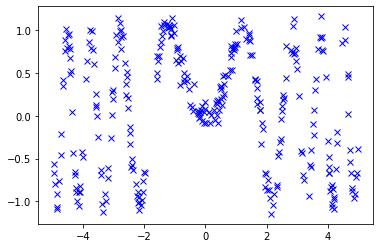

In [ ]:
plt.plot(x_train[:,1], y_train, 'bx')

Define the model:

In [ ]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        self.x = x
        self.y = y

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        m,n = x.shape
        m_train, = self.y.shape

        # make a (m,m_train,n) array d 
        # so that d[i] is an array of shape (m_train,n) that 
        # contains the differences between 
        # x[i] and the training examples
        d = x.reshape((m,1,n)) - self.x
        
        # shape (m, m_train) array 
        # with the norms of these differences
        d_normed = np.linalg.norm(d, ord=2, axis=2) 
        
        # shape (m, m_train) tensor 
        # such that w[i] is a an (m_train,) array
        # that contains the local weights of x[i]
        w = np.exp(-1/(2*self.tau**2)* d_normed)
        
        #turn w into diagonal matrices
        # W has shape (m,m_train, m_train)
        W = np.apply_along_axis(np.diag, axis=1, arr=w)     
        
        # compute theta with the formula from (a)ii.
        # theta has shape (m,n,1)
        theta = np.linalg.inv(self.x.T @ W @ self.x) @ self.x.T @ W @ self.y.reshape((-1,1))
        
        # return an array of shape (m,)
        return np.ravel(x.reshape((m,1,n)) @ theta )


Fit a model to the training set:

In [ ]:
clf = LocallyWeightedLinearRegression(tau)
clf.fit(x_train,y_train)

Compute predictions on the validation set:

In [ ]:
y_pred = clf.predict(x_val)

Compute the mean squared error:

In [ ]:
def mse(y_p,y):
    return np.mean((y_p -y)**2)

mse(y_pred,y_val)

0.2929604606620909

Plot the predictions on the validation set:

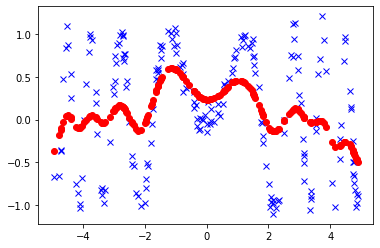

In [ ]:
def plot_predictions(x, y_p, y):
    plt.figure()
    plt.plot(x[:,1], y, 'bx')
    plt.plot(x[:,1], y_p, 'ro')

plot_predictions(x_val, y_pred, y_val)

The model seems to be underfitting.

In [ ]:
tau_values=[3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]

Train  multiple models and plot their predictions on the validation set:

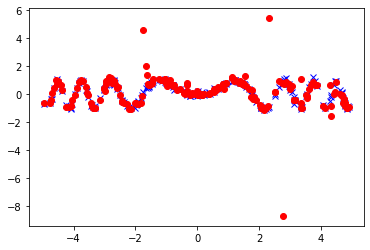

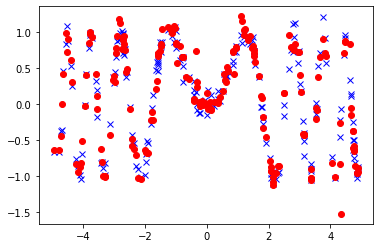

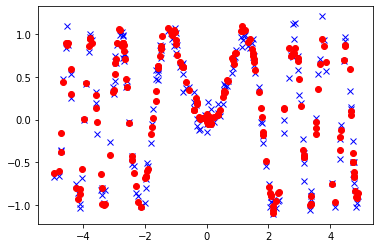

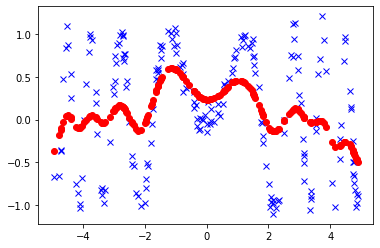

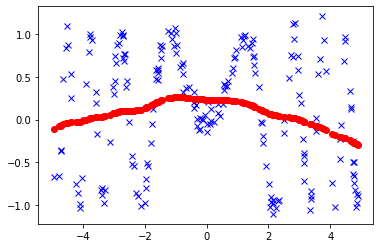

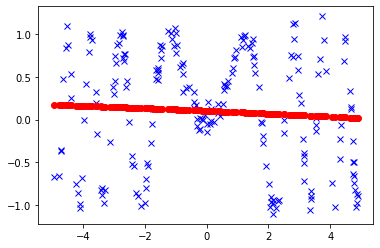

In [ ]:
models = []
mse_values = []

for tau in tau_values:
    model = LocallyWeightedLinearRegression(tau)
    models.append(model)
    model.fit(x_train, y_train)
    y_p = model.predict(x_val)
    mse_values.append(mse(y_p, y_val))
    plot_predictions(x_val, y_p, y_val)

Find the best value for $\tau$:

In [ ]:
best_i = np.argmin(mse_values)
best_tau = tau_values[best_i]
best_model = models[best_i]

print("best tau:", best_tau)

best tau: 0.1


Mean square error for $\tau = 0.1$ on the test set:

In [ ]:
y_pred = best_model.predict(x_test)
mse(y_pred, y_test)

0.003187171325722038

Let's also plot the predictions on the test set:

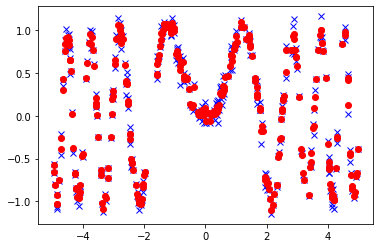

In [ ]:
plot_predictions(x_test, y_pred, y_test)